# I. Introduction
This project is intended to explore the relation between alcohol consumption in the country and the countries tertiary education attainment.

# II. Data
<b>Source for pieces of code are given in the descreption above the code, if not - code is written by me or taken from the laboratories.</b>
<p>Data for this project is taken from two sources presented below.</p>

### Population by educational attainment level 
Downloaded from <a href='http://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-108771_QID_5CAEDEE7_UID_-3F171EB0&layout=AGE,L,X,0;ISCED11,L,X,1;GEO,L,Y,0;SEX,L,Z,0;UNIT,L,Z,1;TIME,C,Z,2;INDICATORS,C,Z,3;&zSelection=DS-108771INDICATORS,OBS_FLAG;DS-108771SEX,T;DS-108771UNIT,PC;DS-108771TIME,2017;&rankName1=UNIT_1_2_-1_2&rankName2=INDICATORS_1_2_-1_2&rankName3=SEX_1_2_-1_2&rankName4=TIME_1_0_1_0&rankName5=AGE_1_2_0_0&rankName6=ISCED11_1_2_1_0&rankName7=GEO_1_2_0_1&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23'>Eurostat</a>
I used eurostat python package to instantly collect the data into pandas dataframe:
https://pypi.org/project/eurostat/

ISCED11 in the dataset stands for the levels of education, 5-8 is higher education and i'm going to sort by that.

Source for iteration over rows in dataframe: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

In [1]:
import pandas as pd
import eurostat
import math
import country_converter as coco


pd.set_option('display.max_rows', 400)
df = eurostat.get_data_df('edat_lfs_9903', True)
df = df[df['age'] == 'Y18-64']      #selecting large age group
df = df[df['isced11'] == 'ED5-8']   #selecting only higher education students
df = df[df['sex'] == 'T']           #selecting total of male and female students

#selecting needed columns from dataset and filtering dataset for invalid values
df = pd.concat([df['geo\\time'], df['2020_value'].astype(str)], axis=1)
for index, row in df.iterrows():
    if(len(row['geo\\time']) != 2 or row['2020_value'] == 'nan'):
        df = df.drop([index])
        
df['geo\\time'] = df['geo\\time'].apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
        
df['2020_value'] = df['2020_value'].astype(float)
df.reset_index(drop=True, inplace=True)
df.columns = ['Country', 'Educational attainment']
df.dropna()

EL not found in ISO2


,Country,Educational attainment
0,Austria,32.7
1,Belgium,39.7
2,Bulgaria,26.8
3,Switzerland,41.1
4,Cyprus,42.4
5,Czech Republic,23.0
6,Germany,28.4
7,Denmark,35.9
8,Estonia,38.9
9,EL,30.1


### Total alcohol consumption per capita by coountry
<b>Link:</b> https://data.worldbank.org/indicator/SH.ALC.PCAP.LI
<p>This dataset was initialy corrupted for reading with python, so I had to manually edit it in notepad. That's why I sent the file together with the project. In addition to that the form of the dataframe was not corresponding to previous one (countries in this dataframe were keys and alcohol consumption - values). The code below transforms it to a form similar to the previous dataset, to further work with it.

In [2]:
df2 = pd.read_csv('alcohol_consumption.csv', index_col=0)   # DataFrame structure
df2 = df2['2018']

#extracting keys(countries)
countries = df2.keys().to_frame().astype(str)
countries.reset_index(drop=True, inplace=True)

#extracting values(alcohol consumption)
alc_consumption = pd.DataFrame(df2.values)

#combining it into the dataframe of intended shape:
df2 = pd.concat([countries, alc_consumption], axis=1)
df2.columns = ['Country', 'Alcohol consumption']

df2.dropna()

,Country,Alcohol consumption
1,Afghanistan,0.210000
2,Angola,6.940000
3,Albania,7.170000
4,Andorra,11.020000
5,Arab World,0.618606
6,United Arab Emirates,3.900000
7,Argentina,9.650000
8,Armenia,5.550000
10,Antigua and Barbuda,6.380000
11,Australia,10.510000


### Final dataframe including all the data needed:
The below dataframe contains information about country, its educational attainment level and it's alcohol consumption. I wanted to use join on the 'country' column (similarly to database join). I discovered join method in pandas, but I had trouble using it, so merge method worked for me. (This was the second solution from here: https://stackoverflow.com/questions/50649853/trying-to-merge-2-dataframes-but-get-valueerror/50649933)

In [3]:
final = df.merge(df2, how='inner', left_on='Country', right_on='Country')
final.dropna()

,Country,Educational attainment,Alcohol consumption
0,Austria,32.7,11.96
1,Belgium,39.7,11.08
2,Bulgaria,26.8,12.65
3,Switzerland,41.1,11.53
4,Cyprus,42.4,10.81
5,Czech Republic,23.0,14.45
6,Germany,28.4,12.91
7,Denmark,35.9,10.26
8,Estonia,38.9,9.23
9,Spain,37.2,12.72


# III. Machine learning
Here I use code from the labs.

In [4]:
#================ Linear model ================
from sklearn.linear_model import LinearRegression     # the type of the model
import numpy as np

x = np.array(final['Alcohol consumption'])
y = np.array(final['Educational attainment'])


model_lin = LinearRegression()
model_lin.fit(x.reshape(-1,1), y)
print(f'Model params: {model_lin.coef_}, {model_lin.intercept_}')

#================ Gerenal Linear Model (GLM) ================
from sklearn.preprocessing import PolynomialFeatures
preX = PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))
print(preX)
model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)
print(f'Model GLM params: {model_GLM.coef_}, {model_GLM.intercept_}')

#================ Support Vector Machines (SVR for Regression and SVC for Classification) ================
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(x.reshape(-1,1), y)


#================ Models predictions for the entire x axis ================
x_plot = np.linspace(start=x.min(), stop=x.max(), num=300)
y_lin_pred_plot = model_lin.predict(x_plot.reshape(-1,1))
Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_GLM_pred_plot = model_GLM.predict(Xtransformed)
y_svr_pred_plot = model_svr.predict(x_plot.reshape(-1,1))


Model params: [0.71431579], 25.111888302620294
PolynomialFeatures(degree=3)
Model GLM params: [ 0.         -1.20114904  0.51413634 -0.02736242], 21.799659790408825


# IV. Conclusions / knowledge visualization

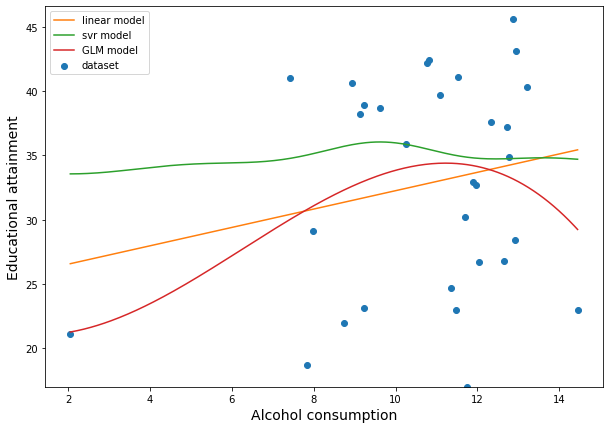

In [5]:
import matplotlib.pyplot as plt
#================ Visualize the dataset and models ======================

plt.figure(figsize=(10,7))
plt.scatter(x, y, label='dataset')
plt.plot(x_plot, y_lin_pred_plot, label='linear model', color='tab:orange')
plt.plot(x_plot, y_svr_pred_plot, label='svr model', color='tab:green')
plt.plot(x_plot, y_GLM_pred_plot, label='GLM model', color='tab:red')
plt.xlabel('Alcohol consumption', fontsize=14)
plt.ylabel('Educational attainment', fontsize=14)
plt.legend()
plt.ylim([y.min(), y.max()+1])
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

#predicting for all values of x with linear regression
y_lin_pred = model_lin.predict(x.reshape(-1,1))

#predicting for all values of x with SVR
y_svr_pred = model_svr.predict(x.reshape(-1,1))

#predicting for all values of x with GLM
y_plot = np.linspace(start=y.min(), stop=y.max(), num=300)
Xtransformed = preX.fit_transform(x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(Xtransformed)

#linear regression mean squared error
print(mean_squared_error(y, y_lin_pred))
#SVR mean squared error
print(mean_squared_error(y, y_svr_pred))
#GLM mean squared error
print(mean_squared_error(y, y_GLM_pred))

64.07962538511761
70.40991901010464
60.82132853563061


The conclusion here is, that even if the alcohol consumption in the country affects the eduational attainment in the country, the effect of it is not significant enough, to notice correlation between the two. There are a lot of other factors that could possibly affect the educational attainment for instance (wealthiness of the country, level of education, etc).

We can see that the mean squared error for each type of model is larger than the distance from the lowest to the highest value of y (educational attainment), so, being straightforward, the prediction is far from being valid.